In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from CASutils import averaging_utils as avg
from CASutils import linfit_utils as linfit
from CASutils import mapplot_utils as mymaps
from CASutils import colorbar_utils as cbars

import warnings
warnings.filterwarnings('ignore')

import sys

In [2]:
plotpath="/project/cas/islas/python_plots/singleforcing_paper/figures/supplemental/"

In [3]:
aer1_pom_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_BURDENPOM_am.nc")
aer1_dust_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_BURDENDUST_am.nc")
aer1_seasalt_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_BURDENSEASALT_am.nc")
aer1_soa_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_BURDENSOA_am.nc")

aer2_pom_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_BURDENPOMdn_am.nc")
aer2_dust_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_BURDENDUSTdn_am.nc")
aer2_seasalt_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_BURDENSEASALTdn_am.nc")
aer2_soa_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_BURDENSOAdn_am.nc")

In [4]:
aer1_pom_burden = aer1_pom_burden.mean('M')
aer1_dust_burden = aer1_dust_burden.mean('M')
aer1_seasalt_burden = aer1_seasalt_burden.mean('M')
aer1_soa_burden = aer1_soa_burden.mean('M')

aer2_pom_burden = aer2_pom_burden.mean('M')
aer2_dust_burden = aer2_dust_burden.mean('M')
aer2_seasalt_burden = aer2_seasalt_burden.mean('M')
aer2_soa_burden = aer2_soa_burden.mean('M')

In [5]:
aer1_pom_burden_gm = avg.cosweightlonlat(aer1_pom_burden, 0, 360, -90, 90).load()
aer1_dust_burden_gm = avg.cosweightlonlat(aer1_dust_burden, 0, 360, -90, 90).load()
aer1_seasalt_burden_gm = avg.cosweightlonlat(aer1_seasalt_burden, 0, 360, -90, 90).load()
aer1_soa_burden_gm = avg.cosweightlonlat(aer1_soa_burden, 0, 360, -90, 90).load()

aer2_pom_burden_gm = avg.cosweightlonlat(aer2_pom_burden, 0, 360, -90, 90).load()
aer2_dust_burden_gm = avg.cosweightlonlat(aer2_dust_burden, 0, 360, -90, 90).load()
aer2_seasalt_burden_gm = avg.cosweightlonlat(aer2_seasalt_burden, 0, 360, -90, 90).load()
aer2_soa_burden_gm = avg.cosweightlonlat(aer2_soa_burden, 0, 360, -90, 90).load()

In [6]:
cesm2boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/figS4/CESM2_bootstrap.nc")

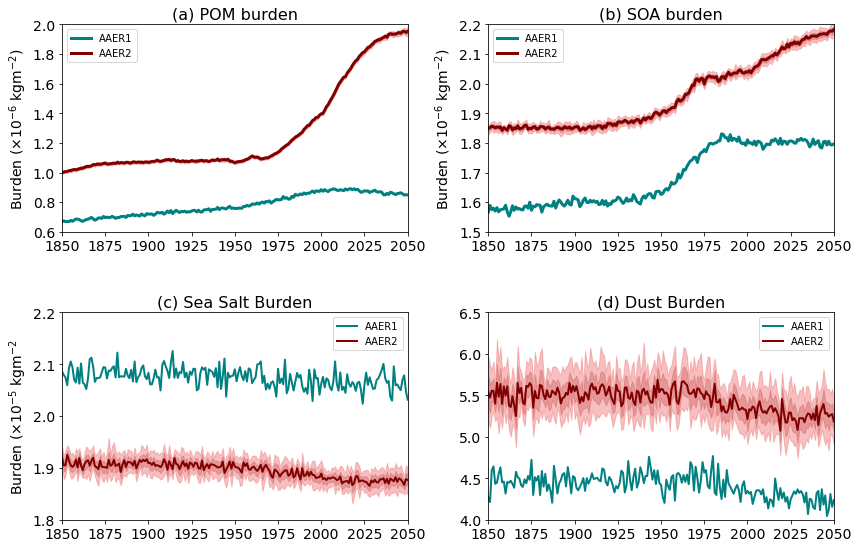

In [28]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_axes([0.08,0.77,0.3,0.18])
ax.set_ylim(0.6e-6,2e-6)
ax.set_yticks([0.6e-6,0.8e-6,1e-6,1.2e-6,1.4e-6,1.6e-6,1.8e-6,2e-6])
ax.set_yticklabels(['0.6','0.8','1.0','1.2','1.4','1.6','1.8','2.0'], fontsize=14)
ax.set_ylabel('Burden ($\\times$10$^{-6}$ kgm$^{-2}$)', fontsize=14)
ax.set_xticks([1850,1875,1900,1925,1950,1975,2000,2025,2050])
ax.set_xticklabels(['1850','1875','1900','1925','1950','1975','2000','2025','2050'], fontsize=14)
ax.set_title('(a) POM burden', fontsize=16)
ax.set_xlim(1850,2050)

ax.plot(aer1_pom_burden_gm.year, aer1_pom_burden_gm.BURDENPOM, color='teal', linewidth=3, label='AAER1')

ax.fill_between(cesm2boot.year, cesm2boot.BURDENPOMdn_min95_3, cesm2boot.BURDENPOMdn_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot.year, cesm2boot.BURDENPOMdn_min95, cesm2boot.BURDENPOMdn_max95, color='indianred', alpha=0.4)
ax.plot(aer2_pom_burden_gm.year, aer2_pom_burden_gm.BURDENPOMdn, color='maroon', linewidth=3, label='AAER2')

ax.legend()


ax = fig.add_axes([0.45,0.77,0.3,0.18])
ax.set_ylim(1.5e-6,2.2e-6)
ax.set_yticks([1.5e-6,1.6e-6,1.7e-6,1.8e-6,1.9e-6,2e-6,2.1e-6,2.2e-6])
ax.set_yticklabels(['1.5','1.6','1.7','1.8','1.9','2.0','2.1','2.2'], fontsize=14)
ax.set_ylabel('Burden ($\\times$10$^{-6}$ kgm$^{-2}$)', fontsize=14)
ax.set_xticks([1850,1875,1900,1925,1950,1975,2000,2025,2050])
ax.set_xticklabels(['1850','1875','1900','1925','1950','1975','2000','2025','2050'], fontsize=14)
ax.set_title('(b) SOA burden', fontsize=16)
ax.set_xlim(1850,2050)

ax.plot(aer1_soa_burden_gm.year, aer1_soa_burden_gm.BURDENSOA, color='teal', linewidth=3, label='AAER1')

ax.fill_between(cesm2boot.year, cesm2boot.BURDENSOAdn_min95_3, cesm2boot.BURDENSOAdn_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot.year, cesm2boot.BURDENSOAdn_min95, cesm2boot.BURDENSOAdn_max95, color='indianred', alpha=0.4)
ax.plot(aer2_soa_burden_gm.year, aer2_soa_burden_gm.BURDENSOAdn, color='maroon', linewidth=3, label='AAER2')

ax.legend()


ax = fig.add_axes([0.08,0.52,0.3,0.18])
ax.set_ylim(1.8e-5,2.2e-5)
ax.set_yticks([1.8e-5,1.9e-5,2e-5,2.1e-5,2.2e-5])
ax.set_yticklabels(['1.8','1.9','2.0','2.1','2.2'], fontsize=14)
ax.set_ylabel('Burden ($\\times$10$^{-5}$ kgm$^{-2}$', fontsize=14)
ax.set_title('(c) Sea Salt Burden', fontsize=16)
ax.set_xlim(1850,2050)
ax.set_xticks([1850,1875,1900,1925,1950,1975,2000,2025,2050])
ax.set_xticklabels(['1850','1875','1900','1925','1950','1975','2000','2025','2050'], fontsize=14)

ax.plot(aer1_seasalt_burden_gm.year, aer1_seasalt_burden_gm.BURDENSEASALT, color='teal', linewidth=2, label='AAER1')

ax.fill_between(cesm2boot.year, cesm2boot.BURDENSEASALTdn_min95_3, cesm2boot.BURDENSEASALTdn_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot.year, cesm2boot.BURDENSEASALTdn_min95, cesm2boot.BURDENSEASALTdn_max95, color='indianred', alpha=0.4)
ax.plot(aer2_seasalt_burden_gm.year, aer2_seasalt_burden_gm.BURDENSEASALTdn, color='maroon', linewidth=2, label='AAER2')

ax.legend()


ax = fig.add_axes([0.45,0.52,0.3,0.18])
ax.set_ylim(4e-5,6.5e-5)
ax.set_yticks([4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5])
ax.set_yticklabels(['4.0','4.5','5.0','5.5','6.0','6.5'], fontsize=14)
ax.set_xlim(1850,2050)
ax.set_xticks([1850,1875,1900,1925,1950,1975,2000,2025,2050])
ax.set_xticklabels(['1850','1875','1900','1925','1950','1975','2000','2025','2050'], fontsize=14)
ax.set_title('(d) Dust Burden', fontsize=16)

ax.plot(aer1_dust_burden_gm.year, aer1_dust_burden_gm.BURDENDUST, color='teal', linewidth=2, label='AAER1')

ax.fill_between(cesm2boot.year, cesm2boot.BURDENDUSTdn_min95_3, cesm2boot.BURDENDUSTdn_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot.year, cesm2boot.BURDENDUSTdn_min95, cesm2boot.BURDENDUSTdn_max95, color='indianred', alpha=0.4)
ax.plot(aer2_dust_burden_gm.year, aer2_dust_burden_gm.BURDENDUSTdn, color='maroon', linewidth=2, label='AAER2')

ax.legend()

fig.savefig(plotpath+'figS4.png', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'figS4.pdf', bbox_inches='tight', facecolor='white')

In [9]:
print(cesm2boot)

<xarray.Dataset>
Dimensions:                  (year: 201)
Coordinates:
  * year                     (year) int64 1850 1851 1852 1853 ... 2048 2049 2050
    quantile                 float64 ...
Data variables: (12/16)
    BURDENPOMdn_min95        (year) float64 ...
    BURDENPOMdn_max95        (year) float64 ...
    BURDENPOMdn_min95_3      (year) float64 ...
    BURDENPOMdn_max95_3      (year) float64 ...
    BURDENDUSTdn_min95       (year) float64 ...
    BURDENDUSTdn_max95       (year) float64 ...
    ...                       ...
    BURDENSEASALTdn_min95_3  (year) float64 ...
    BURDENSEASALTdn_max95_3  (year) float64 ...
    BURDENSOAdn_min95        (year) float64 ...
    BURDENSOAdn_max95        (year) float64 ...
    BURDENSOAdn_min95_3      (year) float64 ...
    BURDENSOAdn_max95_3      (year) float64 ...
